2010-01-05 | BUY 1555 units at 6.43
2019-12-31 | inventory 0 units at 70.851692
Final balance [&] 110176.54
Net Performance [%] 1001.77
Trades Executed [#] 2
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-05 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2515 non-null   float64
 1   return  2515 non-null   float64
dtypes: float64(2)
memory usage: 58.9 KB
None
                price    return
Price                          
2019-12-24  68.588493  0.000951
2019-12-26  69.949303  0.019646
2019-12-27  69.922775 -0.000379
2019-12-30  70.337769  0.005917
2019-12-31  70.851692  0.007280


C:\Users\Ryouh\AppData\Local\Temp\ipykernel_25868\3707058813.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw.index = pd.to_datetime(raw.index, errors='coerce')


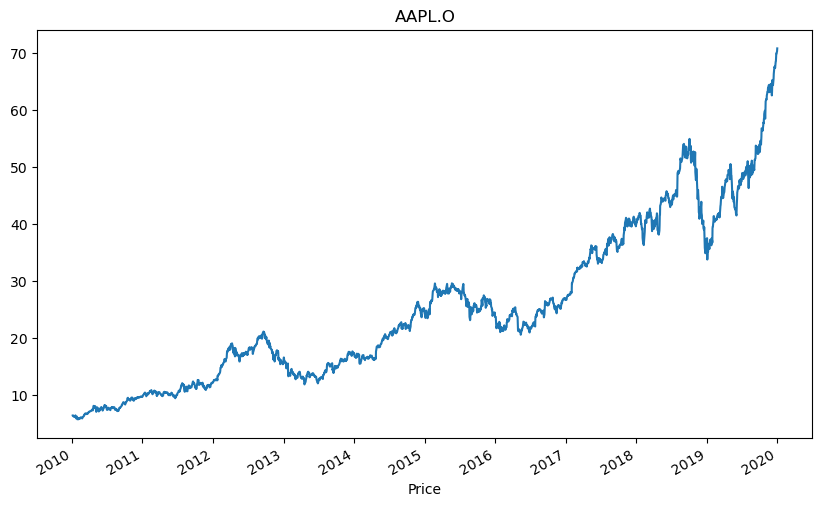

C:\Users\Ryouh\AppData\Local\Temp\ipykernel_25868\3707058813.py:105: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw.index = pd.to_datetime(raw.index, errors='coerce')


2010-01-05 | BUY 1555 units at 6.43
2019-12-31 | inventory 0 units at 70.851692
Final balance [&] 110176.54
Net Performance [%] 1001.77
Trades Executed [#] 2
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-05 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2515 non-null   float64
 1   return  2515 non-null   float64
dtypes: float64(2)
memory usage: 58.9 KB
None
                price    return
Price                          
2019-12-24  68.588493  0.000951
2019-12-26  69.949303  0.019646
2019-12-27  69.922775 -0.000379
2019-12-30  70.337769  0.005917
2019-12-31  70.851692  0.007280


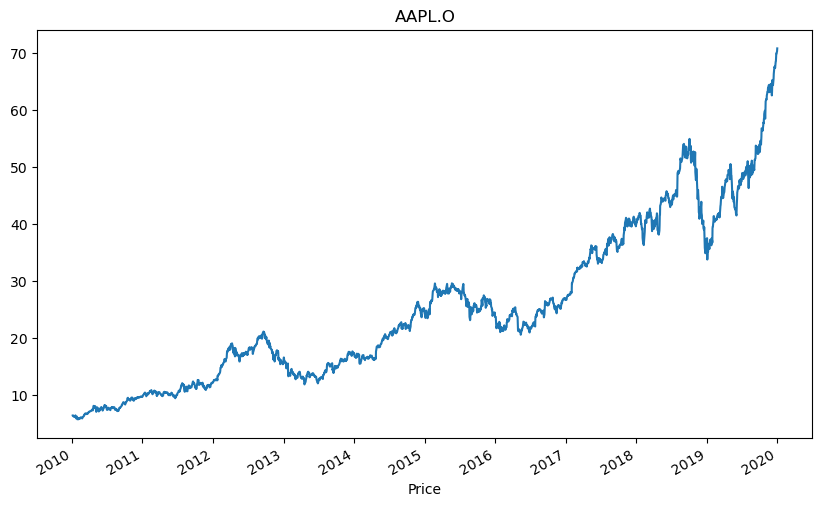

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class BacktestBase:

    def __init__(self, symbol, start, end, amount, ftc=0.0, verbose=True):
        self.symbol = symbol
        self.start = pd.to_datetime(start)
        self.end = pd.to_datetime(end)
        self.amount = amount
        self.initial_amount = amount
        self.ftc = ftc
        self.verbose = verbose

        self.units = 0
        self.trades = 0

        self.get_data()

    def get_data(self):
        raw = pd.read_csv('tr_eikon_eod_data.csv', index_col=0)

        raw.index = pd.to_datetime(raw.index, errors='coerce')
        raw = raw[raw.index.notna()]

        raw[self.symbol] = pd.to_numeric(raw[self.symbol], errors='coerce')
        raw = raw.dropna()

        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw['price'] / raw['price'].shift(1))
        self.data = raw.dropna()

    def plot_data(self):
        self.data['price'].plot(figsize=(10, 6), title=self.symbol)

    def get_date_price(self, bar):
        date = str(self.data.index[bar])[:10]
        price = self.data.price.iloc[bar]
        return date, price

    def place_buy_order(self, bar, amount):
        date, price = self.get_date_price(bar)
        units = int(amount / price)
        self.amount -= units * price
        self.units += units
        self.trades += 1

        if self.verbose:
            print(f'{date} | BUY {units} units at {price:.2f}')

    def close_out(self, bar):
        date, price = self.get_date_price(bar)
        self.amount += self.units * price
        self.units = 0
        self.trades += 1

        if self.verbose:
            print(f'{date} | inventory {self.units} units at {price:2f}')
            print('=' * 55)

        print('Final balance [&] {:.2f}'.format(self.amount))
        perf = ((self.amount - self.initial_amount) / self.initial_amount * 100)
        print(f'Net Performance [%] {perf:.2f}')
        print(f'Trades Executed [#] {self.trades}')
        print('=' * 55)


if __name__ == '__main__':
    bb = BacktestBase('AAPL.O', '2010-1-1', '2019-12-31', 10000)

    bb.place_buy_order(bar=0, amount=bb.amount)
    bb.close_out(bar=len(bb.data) - 1)

    print(bb.data.info())
    print(bb.data.tail())
    bb.plot_data()
    plt.show()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class BacktestBase:

    def __init__(self, symbol, start, end, amount, ftc=0.0, verbose=True):
        self.symbol = symbol
        self.start = pd.to_datetime(start)
        self.end = pd.to_datetime(end)
        self.amount = amount
        self.initial_amount = amount
        self.ftc = ftc
        self.verbose = verbose

        self.units = 0
        self.trades = 0

        self.get_data()

    def get_data(self):
        raw = pd.read_csv('tr_eikon_eod_data.csv', index_col=0)

        raw.index = pd.to_datetime(raw.index, errors='coerce')
        raw = raw[raw.index.notna()]

        raw[self.symbol] = pd.to_numeric(raw[self.symbol], errors='coerce')
        raw = raw.dropna()

        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw['price'] / raw['price'].shift(1))
        self.data = raw.dropna()

    def plot_data(self):
        self.data['price'].plot(figsize=(10, 6), title=self.symbol)

    def get_date_price(self, bar):
        date = str(self.data.index[bar])[:10]
        price = self.data.price.iloc[bar]
        return date, price

    def place_buy_order(self, bar, amount):
        date, price = self.get_date_price(bar)
        units = int(amount / price)
        self.amount -= units * price
        self.units += units
        self.trades += 1

        if self.verbose:
            print(f'{date} | BUY {units} units at {price:.2f}')

    def close_out(self, bar):
        date, price = self.get_date_price(bar)
        self.amount += self.units * price
        self.units = 0
        self.trades += 1

        if self.verbose:
            print(f'{date} | inventory {self.units} units at {price:2f}')
            print('=' * 55)

        print('Final balance [&] {:.2f}'.format(self.amount))
        perf = ((self.amount - self.initial_amount) / self.initial_amount * 100)
        print(f'Net Performance [%] {perf:.2f}')
        print(f'Trades Executed [#] {self.trades}')
        print('=' * 55)


if __name__ == '__main__':
    bb = BacktestBase('AAPL.O', '2010-1-1', '2019-12-31', 10000)

    bb.place_buy_order(bar=0, amount=bb.amount)
    bb.close_out(bar=len(bb.data) - 1)

    print(bb.data.info())
    print(bb.data.tail())
    bb.plot_data()
    plt.show()
